In [1]:
# General Imports
import tensorflow as tf
import pandas as pd
import numpy as np
import random
import os
import kagglehub
import cv2


# Visualization
import matplotlib.pyplot as plt

# Building Model
from keras.utils import plot_model
from tensorflow.keras import models
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import legacy
from tensorflow.keras.optimizers import Adam

# Training Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint

# Data Processing
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [8]:
#Download data set and get the path
path = kagglehub.dataset_download("masoudnickparvar/brain-tumor-mri-dataset")

print("Path to dataset files:", path);


Path to dataset files: /Users/turkan/.cache/kagglehub/datasets/masoudnickparvar/brain-tumor-mri-dataset/versions/1


In [9]:
train_dir = "/Users/turkan/.cache/kagglehub/datasets/masoudnickparvar/brain-tumor-mri-dataset/versions/1/Training"
test_dir = "/Users/turkan/.cache/kagglehub/datasets/masoudnickparvar/brain-tumor-mri-dataset/versions/1/Testing"
#train_dataset = train_dir.flow_from_directory(train_dir, target_size=(250,250))
#test_dataset = test_dir.flow_from_directory(test_dir, target_size=(250,250))


In [10]:
cv2.imread("/Users/turkan/.cache/kagglehub/datasets/masoudnickparvar/brain-tumor-mri-dataset/versions/1/Training/glioma/Tr-glTr_0000.jpg").shape

(512, 512, 3)

In [11]:
img = load_img("/Users/turkan/.cache/kagglehub/datasets/masoudnickparvar/brain-tumor-mri-dataset/versions/1/Training/glioma/Tr-glTr_0000.jpg")

In [12]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    batch_size=32,
    label_mode="categorical",
    image_size=(256, 256),
    color_mode= 'rgb'
)

test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    batch_size=32,
    label_mode="categorical",
    image_size=(256, 256),
    color_mode= 'rgb'
)


Found 5704 files belonging to 4 classes.
Found 1311 files belonging to 4 classes.


In [13]:
train_dataset.class_names

['glioma', 'meningioma', 'notumor', 'pituitary']

In [14]:
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

In [9]:
model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(256,256,3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25)) # Dropout 25% of the nodes of the previous layer during training
model.add(Flatten())     # Flatten, and add a fully connected layer
model.add(Dense(128, activation='relu')) 
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax')) # Last layer: 10 class nodes, with dropout
model.summary()

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model, iterating on the data in batches of 32 samples
model.fit(train_dataset, epochs=15, batch_size=32, validation_data=test_dataset, steps_per_epoch=50) 


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 252, 252, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 126, 126, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 126, 126, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 508032)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    65,028,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 65,033,828 (248.08 MB)

 Trainable params: 65,033,828 (248.08 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 64s 1s/step - accuracy: 0.3353 - loss: 1401.1210 - val_accuracy: 0.4783 - val_loss: 1.6447
Epoch 2/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 75s 1s/step - accuracy: 0.3808 - loss: 1.3404 - val_accuracy: 0.5172 - val_loss: 1.1965
Epoch 3/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 76s 2s/step - accuracy: 0.3846 - loss: 1.3276 - val_accuracy: 0.3883 - val_loss: 1.2910
Epoch 4/15
29/50 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.3727 - loss: 1.3175

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


50/50 ━━━━━━━━━━━━━━━━━━━━ 45s 892ms/step - accuracy: 0.3741 - loss: 1.3019 - val_accuracy: 0.4729 - val_loss: 1.2432
Epoch 5/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 76s 2s/step - accuracy: 0.4122 - loss: 1.2186 - val_accuracy: 0.5286 - val_loss: 1.1643
Epoch 6/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 76s 2s/step - accuracy: 0.4789 - loss: 1.2309 - val_accuracy: 0.5584 - val_loss: 1.0742
Epoch 7/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.4857 - loss: 1.0945 - val_accuracy: 0.5019 - val_loss: 1.1372
Epoch 8/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 46s 916ms/step - accuracy: 0.4590 - loss: 1.1013 - val_accuracy: 0.6331 - val_loss: 1.1610
Epoch 9/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 75s 1s/step - accuracy: 0.5017 - loss: 1.1450 - val_accuracy: 0.5164 - val_loss: 1.0891
Epoch 10/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step - accuracy: 0.4841 - loss: 1.0963 - val_accuracy: 0.6308 - val_loss: 0.9663
Epoch 11/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 75s 2s/step - accuracy: 0.5019 - loss: 1.1136 - val_accuracy: 0.6499 - val_loss: 0.

In [15]:
#for getting class indices
datagen = ImageDataGenerator(rescale=1./255)
train_dataset = datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)
test_dataset = datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)
print(train_dataset.class_indices)
print(train_dataset.classes)
print(test_dataset.class_indices)
print(test_dataset.classes)


Found 5704 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.
{'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}
[0 0 0 ... 3 3 3]
{'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}
[0 0 0 ... 3 3 3]


In [16]:
#utilizing cnn with maxpooling, and all the layers are given in a form of list, one by one we provide the layers, 
# so Conv2D(how many filters you want to keep inside this layer which is how many features to learn from, 
# (size of the filters), activation function, input_shape=(256, 256, 3-->dimension because rgb) )
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
                                    #then adding a max pooling layer
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    #4 because 4 classes
                                    #softmax because we have multiple classes and not binary
                                    tf.keras.layers.Dense(4, activation='softmax')])
model.summary()

/Users/turkan/Desktop/VU/ML/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,454,660 (13.18 MB)

 Trainable params: 3,454,660 (13.18 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(loss='categorical_crossentropy', 
              optimizer = Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [18]:
model_fit = model.fit(train_dataset,
          steps_per_epoch=50,  
          epochs=10,
          validation_data=test_dataset) 

Epoch 1/10


/Users/turkan/Desktop/VU/ML/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 196ms/step - accuracy: 0.3944 - loss: 1.2438 - val_accuracy: 0.5782 - val_loss: 0.8941
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 200ms/step - accuracy: 0.7425 - loss: 0.6529 - val_accuracy: 0.7468 - val_loss: 0.6239
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 201ms/step - accuracy: 0.8070 - loss: 0.4776 - val_accuracy: 0.7750 - val_loss: 0.5578
Epoch 4/10
29/50 ━━━━━━━━━━━━━━━━━━━━ 3s 169ms/step - accuracy: 0.8568 - loss: 0.4060

/Users/turkan/Desktop/VU/ML/anaconda3/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 143ms/step - accuracy: 0.8509 - loss: 0.4130 - val_accuracy: 0.7780 - val_loss: 0.5527
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 198ms/step - accuracy: 0.8461 - loss: 0.4155 - val_accuracy: 0.8154 - val_loss: 0.4615
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 197ms/step - accuracy: 0.8664 - loss: 0.3306 - val_accuracy: 0.8276 - val_loss: 0.4307
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 198ms/step - accuracy: 0.8828 - loss: 0.3455 - val_accuracy: 0.8612 - val_loss: 0.3540
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 133ms/step - accuracy: 0.9118 - loss: 0.2760 - val_accuracy: 0.8688 - val_loss: 0.3374
Epoch 9/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 203ms/step - accuracy: 0.8847 - loss: 0.2951 - val_accuracy: 0.8658 - val_loss: 0.3280
Epoch 10/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 199ms/step - accuracy: 0.9175 - loss: 0.2308 - val_accuracy: 0.8863 - val_loss: 0.3081


In [19]:
#TRAINING FOR THE THIRD TIME


In [20]:
#for getting class indices
datagen = ImageDataGenerator(rescale=1./255)
train_dataset = datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)
test_dataset = datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)
print(train_dataset.class_indices)
print(train_dataset.classes)
print(test_dataset.class_indices)
print(test_dataset.classes)


Found 5704 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.
{'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}
[0 0 0 ... 3 3 3]
{'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}
[0 0 0 ... 3 3 3]


In [21]:
#utilizing cnn with maxpooling, and all the layers are given in a form of list, one by one we provide the layers, 
# so Conv2D(how many filters you want to keep inside this layer which is how many features to learn from, 
# (size of the filters), activation function, input_shape=(256, 256, 3-->dimension because rgb) )
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
                                    #then adding a max pooling layer
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    #4 because 4 classes
                                    #softmax because we have multiple classes and not binary
                                    tf.keras.layers.Dense(4, activation='softmax')])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,454,660 (13.18 MB)

 Trainable params: 3,454,660 (13.18 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.compile(loss='categorical_crossentropy', 
              optimizer = Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [23]:
model_fit = model.fit(train_dataset,
          steps_per_epoch=50,  
          epochs=15,
          validation_data=test_dataset) 

Epoch 1/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 11s 199ms/step - accuracy: 0.3739 - loss: 1.3100 - val_accuracy: 0.6430 - val_loss: 0.9156
Epoch 2/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 200ms/step - accuracy: 0.7472 - loss: 0.6463 - val_accuracy: 0.7231 - val_loss: 0.6880
Epoch 3/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 203ms/step - accuracy: 0.7880 - loss: 0.5436 - val_accuracy: 0.7750 - val_loss: 0.5218
Epoch 4/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 134ms/step - accuracy: 0.8097 - loss: 0.4418 - val_accuracy: 0.7918 - val_loss: 0.5118
Epoch 5/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 198ms/step - accuracy: 0.8222 - loss: 0.4683 - val_accuracy: 0.8101 - val_loss: 0.4497
Epoch 6/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 199ms/step - accuracy: 0.8616 - loss: 0.3608 - val_accuracy: 0.7864 - val_loss: 0.5423
Epoch 7/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 198ms/step - accuracy: 0.8734 - loss: 0.3112 - val_accuracy: 0.8200 - val_loss: 0.4383
Epoch 8/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 130ms/step - accuracy: 0.8428 - loss: 0.3720 - val_accura

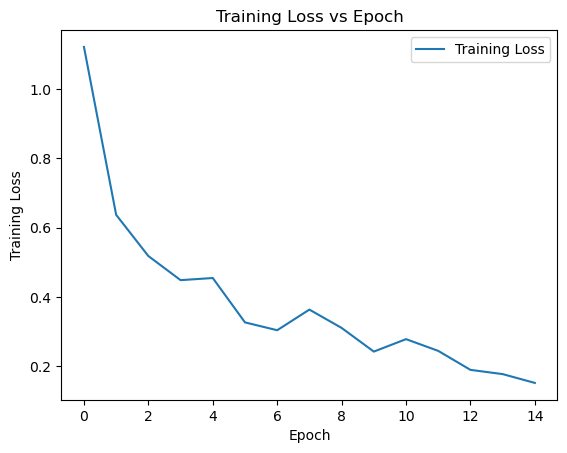

In [25]:
plt.plot(model_fit.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Training Loss vs Epoch')
plt.legend()
plt.show()

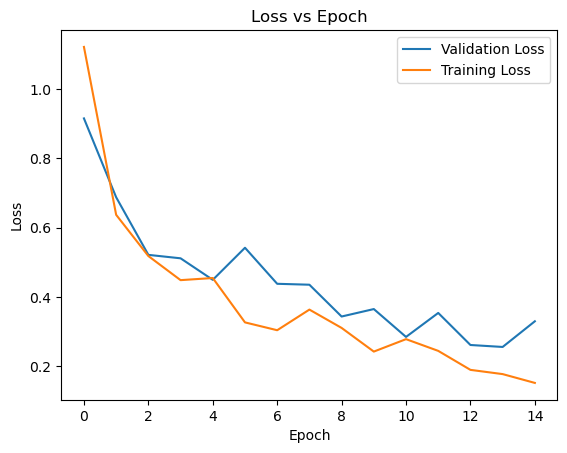

In [31]:
plt.plot(model_fit.history['val_loss'], label='Validation Loss')
plt.plot(model_fit.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.legend()
plt.savefig("epoch-loss.png")
plt.show()